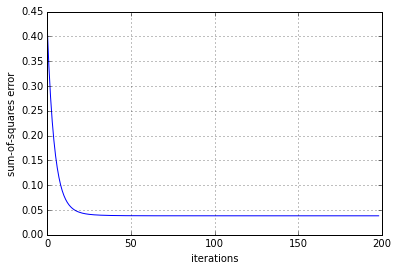

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


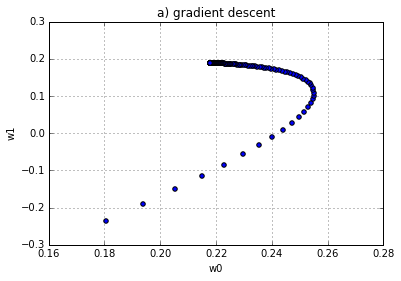

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


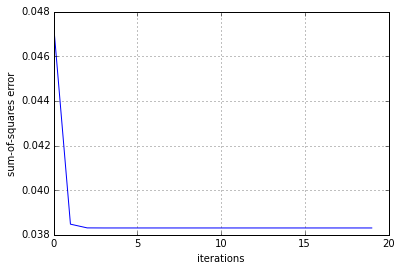

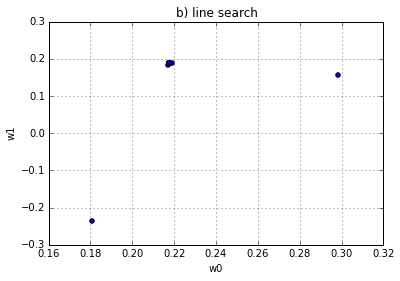

In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd

######### CHOOSE TASKS ##########
solve_a = 1
solve_b = 1
solve_c = 0
#################################

xa = np.matrix([-1.0,0.3,2]).T
ta = np.matrix([-0.1,0.5,0.5]).T

w_initial = np.matrix([rd.random()-0.5,rd.random()-0.5]).T

def output(w,xa):
    X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    y = np.dot(w.T,X)
    return y[0]

def sumsquerror(w,xa,ta):
    arg = output(w,xa)-ta.T
    err = 0.5*np.dot(arg,arg.T)
    return err[0]

def gradient(w,xa,ta):
    X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    H = np.dot(X,np.transpose(X))
    b = -1.0*np.dot(X,ta)
    g = np.dot(H,w)+b
    return g

def alpha_line_search(grad,xa):
    X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    H = np.dot(X,np.transpose(X))
    anum = np.dot(np.transpose(grad),grad)
    Hgrad = np.dot(H,grad)
    aden = np.dot(np.transpose(grad),Hgrad)
    alpha = -1.0 * np.divide( anum , aden )
    return alpha

def alpha_conjugate_gradient(d,grad,xa):
    X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    H = np.dot(X,np.transpose(X))
    anum = np.dot(np.transpose(d),grad)
    Hgrad = np.dot(H,grad)
    aden = np.dot(np.transpose(d),Hgrad)
    alpha = -1.0 * np.divide( anum , aden )
    return alpha

def beta_conjugate_gradient(grad,grad_old):
    bnum = np.dot(np.transpose(grad),grad)
    bden = np.dot(np.transpose(grad_old),grad_old)
    beta = -1.0 * np.divide( bnum , bden )
    return beta

def grad_update_conjugate_gradient(xa,w):
    X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    H = np.dot(X,np.transpose(X))
    grad = np.dot(H,w)
    return grad

def d_update_conjugate_gradient(grad,beta,d):
    d_new = grad + np.multiply(beta,d)
    return d_new

################################################################################
##### a) gradient descent
if solve_a:

    w = w_initial
    n_iter = 0
    iter_max = 200
    Error1 = np.array(np.zeros(iter_max))
    y1 = np.array(np.zeros((iter_max,3)))
    w01 = np.array(np.zeros(iter_max))
    w11 = np.array(np.zeros(iter_max))
    eta = 0.02

    while n_iter < iter_max:
        w01[n_iter] = w[0]
        w11[n_iter] = w[1]
        y1[n_iter] = output(w,xa)
        Error1[n_iter] = sumsquerror(w,xa,ta)
        grad = gradient(w,xa,ta)
        w = w-eta*grad
        n_iter = n_iter+1


    Error1 = np.delete(Error1,0)
    y1 = np.delete(y1,0)

    plt.plot(Error1)
    plt.xlabel('iterations')
    plt.ylabel('sum-of-squares error')
    plt.grid()
    plt.show()

    plt.scatter(w01,w11)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('a) gradient descent')
    plt.grid()
    plt.show()


################################################################################
##### b) line search
if solve_b:

    w = w_initial
    n_iter = 0
    iter_max = 200
    Error2 = np.array(np.zeros(iter_max))
    y2 = np.array(np.zeros((iter_max,3)))
    w02 = np.array(np.zeros(iter_max))
    w12 = np.array(np.zeros(iter_max))

    while n_iter < iter_max:
        w02[n_iter] = w[0]
        w12[n_iter] = w[1]
        y2[n_iter] = output(w,xa)
        Error2[n_iter] = sumsquerror(w,xa,ta)
        grad = gradient(w,xa,ta)
        alpha = alpha_line_search(grad,xa)
        w = w + np.multiply(alpha,grad)
        n_iter = n_iter+1


    Error2 = np.delete(Error2,0)
    y2 = np.delete(y2,0)

    plt.plot(Error2)
    plt.xlabel('iterations')
    plt.ylabel('sum-of-squares error')
    plt.grid()
    plt.show()

    plt.scatter(w02,w12)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('b) line search')
    plt.grid()
    plt.show()

################################################################################
##### c) conjugate gradient
if solve_c:

    grad = gradient(w_initial,xa,ta)
    w = -1*grad
    d = w
    n_iter = 0
    iter_max = 2000
    Error3 = np.array(np.zeros(iter_max))
    y3 = np.array(np.zeros((iter_max,3)))
    w03 = np.array(np.zeros(iter_max))
    w13 = np.array(np.zeros(iter_max))
    #w03all = w03
    #w13all = w13
    E_threshold = 0.3

    while n_iter < iter_max:
        w03[n_iter] = w[0]
        w13[n_iter] = w[1]
        #w03all[n_iter] = w[0]
        #w13all[n_iter] = w[1]

        n_itit = 0
        while n_itit < 2:
            y = output(w,xa)
            E = sumsquerror(w,xa,ta)
            alpha = alpha_conjugate_gradient(d,grad,xa)
            w = w + np.multiply(alpha,d)
            n_itit = n_itit+1

        y3[n_iter] = y
        Error3[n_iter] = E
        grad_old = grad
        grad = gradient(w,xa,ta)
        beta = beta_conjugate_gradient(grad,grad_old)
        d = d_update_conjugate_gradient(grad,beta,d)
        n_iter = n_iter+1


    Error3 = np.delete(Error3,0)
    y3 = np.delete(y3,0)

    plt.plot(Error3)
    plt.xlabel('iterations')
    plt.ylabel('sum-of-squares error')
    plt.grid()
    plt.show()

    plt.scatter(w03,w13)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('c) conjugate gradient')
    plt.grid()
    plt.show()
